<a href="https://colab.research.google.com/github/Auzek2002/Linear_Regression_With_Normalization/blob/main/Multi_Var_Linear_Regression_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libs:

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

Some Test Data:

In [49]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])


Computing Cost:

In [50]:
def compute_cost(x,y,w,b):
  m= x.shape[0]
  cost =0

  for i in range (m):
    f_wb = np.dot(x[i],w) + b
    cost += (f_wb - y[i])**2
  total_cost = cost/(2*m)
  return total_cost

Computing Gradiants:

In [51]:
def compute_gradiant(x,y,w,b):
  m,n = x.shape
  dj_dw = np.zeros(n)
  dj_db = 0

  for i in range (m):
    f_wb = np.dot(x[i],w) + b
    for j in range (n):
      dj_dw[j] += (f_wb - y[i]) * x[i,j]
    dj_db += (f_wb - y[i])
  dj_dw = dj_dw/m
  dj_db = dj_db/m
  return dj_dw,dj_db

Gradiant Descent:

In [52]:
def gradiant_descent(x,y,w_in,b_in,alpha,iters,cost_function,gradiant_function):
  j_history = []
  iterations = []
  w = copy.deepcopy(w_in)
  b = b_in

  for i in range (iters):
    dj_dw, dj_db = gradiant_function(x,y,w,b)
    w = w - alpha*dj_dw
    b = b - alpha*dj_db

    if i <10000:
      j_history.append(cost_function(x,y,w,b))

    if i % math.ceil(iters/10) == 0:
      print(f"Iterations: {i:4d}, cost: {j_history[-1]:8.2f}")
      iterations.append(i)
  return w,b,j_history,iterations

Z-Score Normalization

In [53]:
def z_score_normalization(x):
  mu = np.mean(x,axis=0)
  sigma = np.std(x,axis=0)
  x_norm = (x-mu)/sigma
  return (x_norm,mu,sigma)

Iterations:    0, cost: 20850.28
Iterations:  100, cost:     0.00
Iterations:  200, cost:     0.00
Iterations:  300, cost:     0.00
Iterations:  400, cost:     0.00
Iterations:  500, cost:     0.00
Iterations:  600, cost:     0.00
Iterations:  700, cost:     0.00
Iterations:  800, cost:     0.00
Iterations:  900, cost:     0.00
Prediction: 459.99999999999994 vs Actual: 460
Prediction: 231.99999999999994 vs Actual: 232
Prediction: 177.99999999999994 vs Actual: 178


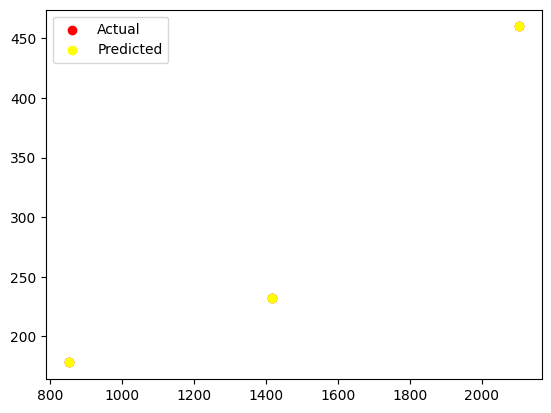

In [54]:
w_i = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
w_init=np.zeros_like(w_i)
b_init=0.
alpha = 3e-1
iterations=1000
m=X_train.shape[0]
x_norm,mu,sigma = z_score_normalization(X_train)
w_final,b_final,j_hist,ii = gradiant_descent(x_norm,y_train,w_init,b_init,alpha,iterations,compute_cost,compute_gradiant);
y_p = np.zeros(m)
for i in range (m):
  y_p[i] = np.dot(x_norm[i],w_final)+b_final
for i in range (m):
  print(f"Prediction: {y_p[i]} vs Actual: {y_train[i]}")

plt.scatter(X_train[:,0],y_train,c='r',label="Actual")
plt.scatter(X_train[:,0],y_p,c='yellow',label='Predicted')
plt.legend()
plt.show()